In [1]:
pip install transformers

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/KevinLAnthony/NLP_Project/main/NLP_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       399 non-null    object
 1   A       399 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [4]:
#df.drop(columns=['Unnamed: 2'], inplace=True)
#df.head()

In [5]:
combined_text = ' '.join(df['A'])
combined_text

'Linear regression is a statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables. The main type of linear regression is simple linear regression, which is used when there are two variables. There are multiple types of regression, including: 1) Linear Regression 2) Multiple Regression 3) Polynomial Regression 4) Ridge Regression 5) Lasso Regression 6) Logistic Regression, among others. Logistic regression is used when the dependent variable is categorical in nature. It estimates the probability that a given instance belongs to a particular category. Statistical significance indicates whether an observed result in a study is likely to be genuine or if it could be due to random chance. Typically, a result is considered statistically significant if its p-value is below a predetermined threshold, commonly 0.05. Regression models can be evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Ro

In [6]:
df['new_column'] = ''
df.at[0, 'new_column'] = combined_text
df.head()

,Q,A,new_column
0,What is linear regression?,Linear regression is a statistical method used...,Linear regression is a statistical method used...
1,What are the types of regression?,"There are multiple types of regression, includ...",
2,What is logistic regression?,Logistic regression is used when the dependent...,
3,What is statistical significance?,Statistical significance indicates whether an ...,
4,How can you evaluate regression models?,Regression models can be evaluated using metri...,


In [7]:
for i in range(len(df)):
    df.at[i, 'new_column'] = combined_text
df.head()

,Q,A,new_column
0,What is linear regression?,Linear regression is a statistical method used...,Linear regression is a statistical method used...
1,What are the types of regression?,"There are multiple types of regression, includ...",Linear regression is a statistical method used...
2,What is logistic regression?,Logistic regression is used when the dependent...,Linear regression is a statistical method used...
3,What is statistical significance?,Statistical significance indicates whether an ...,Linear regression is a statistical method used...
4,How can you evaluate regression models?,Regression models can be evaluated using metri...,Linear regression is a statistical method used...


In [8]:
column_order = ['new_column'] + [col for col in df.columns if col != 'new_column']
df = df[column_order]

df.head()

,new_column,Q,A
0,Linear regression is a statistical method used...,What is linear regression?,Linear regression is a statistical method used...
1,Linear regression is a statistical method used...,What are the types of regression?,"There are multiple types of regression, includ..."
2,Linear regression is a statistical method used...,What is logistic regression?,Logistic regression is used when the dependent...
3,Linear regression is a statistical method used...,What is statistical significance?,Statistical significance indicates whether an ...
4,Linear regression is a statistical method used...,How can you evaluate regression models?,Regression models can be evaluated using metri...


In [9]:
df.rename(columns={'new_column': 'text'}, inplace=True)
df.head()

,text,Q,A
0,Linear regression is a statistical method used...,What is linear regression?,Linear regression is a statistical method used...
1,Linear regression is a statistical method used...,What are the types of regression?,"There are multiple types of regression, includ..."
2,Linear regression is a statistical method used...,What is logistic regression?,Logistic regression is used when the dependent...
3,Linear regression is a statistical method used...,What is statistical significance?,Statistical significance indicates whether an ...
4,Linear regression is a statistical method used...,How can you evaluate regression models?,Regression models can be evaluated using metri...


In [10]:
from transformers import DistilBertForQuestionAnswering, DistilBertTokenizer

model_name = "distilbert-base-cased-distilled-squad"  # Model name for DistilBERT
model = DistilBertForQuestionAnswering.from_pretrained(model_name)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [11]:
random_num = np.random.randint(0,len(df))

question = df["Q"][random_num]
text = df["text"][random_num]

In [12]:
pip install wordninja

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import wordninja
from transformers import DistilBertForQuestionAnswering, DistilBertTokenizer
import torch

model_name = "distilbert-base-cased-distilled-squad"
model = DistilBertForQuestionAnswering.from_pretrained(model_name)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

def detokenize(tokens):
    # Remove "##" from subwords and join them
    detokenized_text = ' '.join(word.replace('##', "") if '##' in word else word for word in tokens)
    #detokenized_text = detokenized_text.replace('re ', 're')
    detokenized_text = ' '.join(wordninja.split(detokenized_text))
    detokenized_text = detokenized_text.replace(' ', '')

    detokenized_text = '. '.join(sentence.capitalize() for sentence in detokenized_text.split('. '))

    # Add spaces between words
    detokenized_text = ' '.join(detokenized_text.split())

   # Use wordninja to separate combined words
    detokenized_text = ' '.join(wordninja.split(detokenized_text))

    detokenized_text = detokenized_text[0].capitalize() + detokenized_text[1:]

    return detokenized_text

def question_answer(question, text):
    # Define max_length based on the model's configuration
    max_length = model.config.max_position_embeddings

    # Tokenize the input
    inputs = tokenizer(question, text, return_tensors='pt', max_length=max_length, truncation=True)
    input_ids = inputs['input_ids']

    # Print tokens for debugging
    tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze().tolist())
    print("Tokens:", tokens)

    # Perform inference
    output = model(**inputs)
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)

    print("Answer Start:", answer_start)
    print("Answer End:", answer_end)

    if answer_end >= answer_start and answer_end < len(tokens):
        # Detokenize the answer
        answer = detokenize(tokens[answer_start:answer_end + 1])
    else:
        answer = "I am unable to find the answer to this question. Can you please ask another question?"

    #print("Text:\n{}".format(text.capitalize()))
    print("\nQuestion:\n{}".format(question.capitalize()))
    print("\nAnswer:\n{}.".format(answer.capitalize()))

from urllib.request import urlopen

# Example usage
question = "What is statistical significance?"
text = urlopen('https://raw.githubusercontent.com/KevinLAnthony/NLP_Project/main/text1.txt').read().decode('utf-8')

question_answer(question, text)

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Tokens: ['[CLS]', 'What', 'is', 'statistical', 'significance', '?', '[SEP]', 'Line', '##ar', 're', '##gression', 'is', 'a', 'statistical', 'method', 'used', 'to', 'model', 'and', 'analyze', 'the', 'relationships', 'between', 'a', 'dependent', 'variable', 'and', 'one', 'or', 'more', 'independent', 'variables', '.', 'The', 'main', 'type', 'of', 'linear', 're', '##gression', 'is', 'simple', 'linear', 're', '##gression', ',', 'which', 'is', 'used', 'when', 'there', 'are', 'two', 'variables', '.', 'There', 'are', 'multiple', 'types', 'of', 're', '##gression', ',', 'including', ':', '1', ')', 'Line', '##ar', 'Reg', '##ression', '2', ')', 'Multiple', 'Reg', '##ression', '3', ')', 'Pol', '##yn', '##omi', '##al', 'Reg', '##ression', '4', ')', 'Ridge', 'Reg', '##ression', '5', ')', 'Las', '##so', 'Reg', '##ression', '6', ')', 'Lo', '##gis', '##tic', 'Reg', '##ression', ',', 'among', 'others', '.', 'Lo', '##gis', '##tic', 're', '##gression', 'is', 'used', 'when', 'the', 'dependent', 'variable', '

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_em_f1_similarity(predicted_answer, ground_truth_answer):
    # Tokenize the answers into lists of words
    predicted_tokens = predicted_answer.lower().split()
    ground_truth_tokens = ground_truth_answer.lower().split()

    # Calculate cosine similarity between TF-IDF vectors of the answers
    vectorizer = CountVectorizer().fit_transform([predicted_answer, ground_truth_answer])
    similarity = cosine_similarity(vectorizer)

    # Use similarity directly as the EM score
    em_score = similarity[0, 1]

    # Calculate F1 score
    common_tokens = set(predicted_tokens) & set(ground_truth_tokens)
    precision = len(common_tokens) / len(predicted_tokens) if len(predicted_tokens) > 0 else 0
    recall = len(common_tokens) / len(ground_truth_tokens) if len(ground_truth_tokens) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return em_score, f1_score

# Example usage
ground_truth = "Linear regression is a statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables. The main type of linear regression is simple linear regression, which is used when there are two variables."
predicted_answer = "A statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables the main type of linear regression is simple linear regression which is used when there are two variables."

em_score, f1_score = calculate_em_f1_similarity(predicted_answer, ground_truth)

print("EM Score:", em_score)
print("F1 Score:", f1_score)

EM Score: 0.982304981623873
F1 Score: 0.7594936708860759


In [15]:
import matplotlib.pyplot as plt

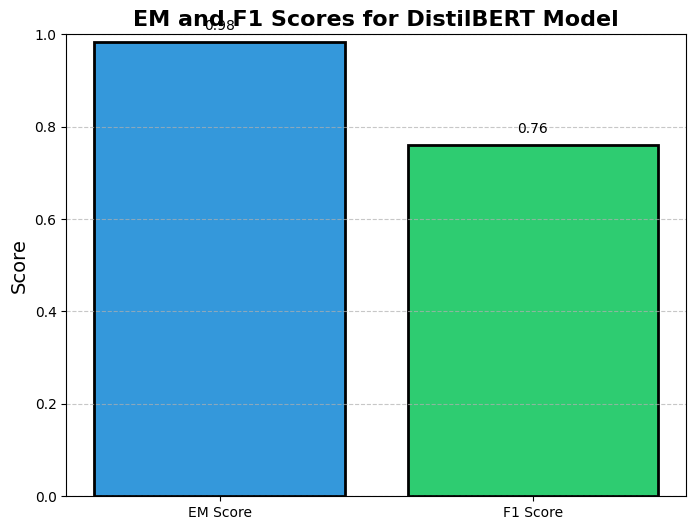

In [17]:
labels = ['EM Score', 'F1 Score']
scores = [em_score, f1_score]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, scores, color=['#3498db', '#2ecc71'], edgecolor='black', linewidth=2)

# Add values on top of the bars
for i, v in enumerate(scores):
    ax.text(i, v + 0.02, f'{v:.2f}', color='black', ha='center', va='bottom')

ax.set_ylabel('Score', fontsize=14)
ax.set_title('EM and F1 Scores for DistilBERT Model', fontsize=16, fontweight='bold')
ax.set_ylim(0, 1)  # Set y-axis limit to 0-1 range for scores
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()